In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import *
import pandas.io.data as web
import matplotlib.pyplot as plt
#ticker_list = pd.read_excel('stocks.xlsx', sheetname='stocks',header=None).val
ticker_list = {
'USO'	:'United States Oil Fund LP (ETF)',
'EZA'	:'iShares MSCI South Africa Index (ETF)',
'EWC'	:'iShares MSCI Canada Index (ETF)',
'GSG'	:'iShares S&P GSCI Commodity-Indexed (ETF)',
'ERUS'	:'iShares MSCI Russia Capped ETF New',
'XLE'	:'Energy Select Sector SPDR (ETF)',
'EPU'	:'iShares MSCI All Peru Capped Index Fund',
'EPOL':'iShares MSCI Poland Investable ETF',
'XLB'	:'Materials Select Sector SPDR',
'THD'	:'iShares MSCI Thailand Inv Mrkt Index Fd',
'IWM'	:'iShares Russell 2000 Index (ETF)',
'XLV'	:'Health Care SPDR (ETF)',
'SLV'	:'iShares Silver Trust (ETF)',
'ECH'	:'iShares MSCI Chile Inv. Mt. Idx. Fd(ETF)',
'XLU'	:'Utilities SPDR (ETF)',
'EWW'	:'iShares MSCI Mexico Inv. Mt. Idx. (ETF)',
'EWL'	:'iShares MSCI Switzerland Index Fund(ETF)',
'MDY'	:'SPDR S&P MidCap 400 ETF',
'EWU'	:'iShares Trust',
'IAU'	:'iShares Gold Trust(ETF)',
'DIA'	:'SPDR Dow Jones Industrial Average ETF',
'EPP'	:'iShares MSCI Pacific ex-Japan Idx (ETF)',
'IWV'	:'iShares Russell 3000 Index (ETF)',
'IWB'	:'iShares Russell 1000 Index (ETF)',
'ILF'	:'iShares S&P Latin America 40 Index (ETF)',
'SPY'	:'SPDR S&P 500 ETF Trust',
'XLI'	:'The Industrial Select Sector SPDR Fund',
'EWP'	:'iShares MSCI Spain Capped ETF',
'EEM'	:'iShares MSCI Emerging Markets Indx (ETF)',
'EWQ'	:'iShares MSCI France Index (ETF)',
'EIDO':'iShares MSCI Indons Invstbl Mrkt Indx Fd',
'EWG'	:'iShares MSCI Germany Index Fund (ETF)',
'EWD'	:'iShares MSCI Sweden Index (ETF)',
'XLF'	:'Financial Select Sector SPDR Fund',
'EWM'	:'iShares MSCI Malaysia Index Fund (ETF)',
'EWT'	:'iShares MSCI Taiwan Index (ETF)',
'EWN'	:'iShares MSCI Netherlands Investable(ETF)',
'QQQ'	:'PowerShares QQQ Trust, Series 1 (ETF)',
'XLY'	:'Consumer Discretionary SPDR (ETF)',
'INDA'	:'Ishares MSCI India ETF',
'EZU'	:'iShares MSCI EMU Index (ETF)',
'EWK'	:'iShares MSCI Belgium Investable Mkt(ETF)',
'XLP'	:'Consumer Staples Select Sect. SPDR (ETF)',
'EWO'	:'iShares MSCI Austria Investable Mkt(ETF)',
'EWZ'	:'iShares MSCI Brazil Index (ETF)',
'EIRL'  :'iShares MSCI Irld noncapped Invstb Mrkt Indx Fd',
'XLK'	:'Technology SPDR (ETF)',
'EIS'	:'iShares MSCI Israel Capped Investable Market Index Fund',
'TUR'	:'Ishares Msci Turkey Inv Market Index Fd',
'EWY'	:'iShares MSCI South Korea Index Fund(ETF)',
'SCJ'	:'iShares MSCI Japan Sm Cap',
'BKF'	:'iShares MSCI BRIC Index Fund (ETF)',
'ENZL'	:'iShares Trust',
'EWS'	:'iShares MSCI Singapore Index Fund (ETF)',
'MCHI'	:'iShares MSCI China Index Fund',
'EPHE':'iShares MSCI Philippines Investable',
'EWI'	:'iShares MSCI Italy Index (ETF)',
'EWJ'	:'iShares MSCI Japan ETF',
'EWH'	:'iShares MSCI Hong Kong Index Fund (ETF)'
    }

vandaag = dt.datetime.today()
#first business day of this month
month_begin = vandaag - BMonthBegin()
start12 = month_begin - BMonthBegin(12)
start6 = month_begin - BMonthBegin(6)
start3 = month_begin - BMonthBegin(3)
start1 = month_begin - BMonthBegin(1)
end = month_begin
start = start12
#beginning of previous month
#start = pmonth - MonthBegin()
#end of previous month
#end = pmonth + MonthEnd()
print start12,start6,start3,start1
print end
#NOTE: i am not going to use this, because even with BMonthBegin it can still be 2016-01-01 which is a holiday, so not present in index
#Better is to just cut the list in 4 parts



2015-04-01 14:16:43.893000 2015-10-01 14:16:43.893000 2016-01-01 14:16:43.893000 2016-03-01 14:16:43.893000
2016-04-01 14:16:43.893000


XLU     12.008095
XLP      9.877049
XLK      8.023199
EIRL     7.647374
XLY      5.878437
QQQ      5.054734
EWK      4.230317
ENZL     2.043868
IAU      1.373391
XLI      0.595664
dtype: float64

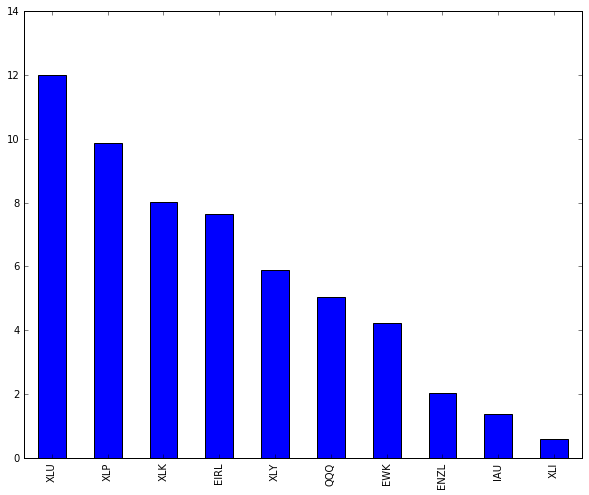

In [6]:
price_change_12m = {}
price_change_6m = {}
price_change_3m = {}
price_change_1m = {}

for ticker in ticker_list:
    prices = web.DataReader(ticker, 'yahoo', start, end)
    closing_prices_12m = prices['Close']
    offset_3m = int(len(closing_prices_12m)/4)
    offset_1m = int(len(closing_prices_12m)/12)
    change_12m = 100 * (closing_prices_12m[-1] - closing_prices_12m[0]) / closing_prices_12m[0]
    change_1m = 100 * (closing_prices_12m[offset_1m] - closing_prices_12m[0]) / closing_prices_12m[0]
    change_3m = 100 * (closing_prices_12m[offset_3m] - closing_prices_12m[0]) / closing_prices_12m[0]
    change_6m = 100 * (closing_prices_12m[offset_3m*2] - closing_prices_12m[0]) / closing_prices_12m[0]
    name = ticker_list[ticker]
    price_change_12m[ticker] = change_12m
    price_change_1m[ticker] = change_1m
    price_change_3m[ticker] = change_3m
    price_change_6m[ticker] = change_6m

pc12 = pd.Series(price_change_12m)
pc6 = pd.Series(price_change_6m)
pc3 = pd.Series(price_change_3m)
pc1 = pd.Series(price_change_1m)
df = pc12.to_frame(name='12month')
df['6month'] = pd.Series(pc6, index=df.index)
df['3month'] = pd.Series(pc3, index=df.index)
df['1month'] = pd.Series(pc1, index=df.index)

r = pc12.nlargest(10)
r.sort_values(inplace=True,ascending=False)
fig, ax = plt.subplots(figsize=(10,8))
r.plot(kind='bar', ax=ax)
r

In [7]:
df


12month     6month     3month     1month
BKF  -20.016159 -19.719828   0.134696  10.021555
DIA    0.554485  -7.989142   0.373424   1.787931
ECH   -9.738835 -19.550895  -8.249941   4.076148
EEM  -15.948803 -19.320703  -2.559687   6.177696
EIDO -14.414414 -36.252249 -16.180180 -10.486486
EIRL   7.647374   3.372278   3.876790   5.177910
EIS   -7.071889  -6.428994   1.110462   1.578019
ENZL   2.043868 -20.289131 -13.210367   0.648061
EPHE -13.536508 -18.757389  -8.410115  -4.819279
EPOL -14.570942 -11.469842  -3.780803   9.133390
EPP  -14.583327 -19.605260  -4.144735   4.385965
EPU  -10.368587 -23.665177   0.757833   6.441608
ERUS  -5.617147 -10.273466   1.699926  13.155950
EWC  -13.516477 -15.750913  -2.710623   6.739927
EWD  -11.864911 -13.239684  -3.915114   2.151826
EWG  -15.215947 -17.807309  -6.578070  -0.332226
EWH  -11.730342 -14.067411   1.528090   7.955056
EWI  -19.679787  -4.469646   0.667111   3.402268
EWJ  -11.526232  -9.220986   2.543720   3.497615
EWK    4.230317  -3.231498   3.349001   3.407756
EWL  -11.994042  -8.958328  -2.053566   4.285723
EWM  -33.383234 -25.823353  -8.008982   2.395210
EWN   -3.658537  -7.946499   2.163647   3.776550
EWO   -1.436602  -6.433479   0.562149   6.433485
EWP  -23.304002 -15.810389  -4.825436   2.952030
EWQ   -8.720491  -8.339680  -1.294745   4.760091
EWS  -15.903801 -21.101629  -2.327386   6.206362
EWT  -12.388818 -16.391360   1.715375   5.336722
EWU  -14.340867  -9.597353   0.882526   6.012135
EWW   -8.924328 -12.521205  -3.715641  -1.034946
EWY   -9.287329 -15.002614  -2.927339   6.569091
EWZ  -16.620158 -31.937981   0.031002  12.279067
EZA  -22.715983 -21.531944  -4.867712   3.230520
EZU  -12.426187 -11.835689  -2.849810   2.464696
GSG  -32.246744 -14.343033   4.162482   8.525566
IAU    1.373391  -7.467811  -3.004292  -2.231760
ILF  -15.966942 -25.256195  -2.909088   6.743805
INDA -16.553431 -11.766525  -5.466337  -8.616433
IWB   -0.589153  -7.251772   1.264945   2.183334
IWM  -10.689596 -12.232761   0.651025  -1.969134
IWV   -1.610688  -7.818700   1.084578   1.764468
MCHI -23.524099 -20.906298   0.451345  14.208339
MDY   -4.348302  -9.887767  -0.698777  -0.336721
QQQ    5.054734  -3.131843   2.732028   3.807711
SCJ   -0.017618  -2.607930   5.515420   2.378851
SLV  -11.645102 -14.540974  -8.194701  -4.682686
SPY    0.593097  -6.840055   0.875062   2.440449
THD  -16.364994 -22.811809  -7.463433  -2.082818
TUR   -5.879817 -21.300881  -3.532197   0.861516
USO  -46.928328 -16.496018   8.646189  16.040956
XLB   -7.522478 -18.397384  -0.551913   4.762882
XLE  -21.273849 -21.093344  -4.332131   6.846319
XLF   -5.770025  -5.936073   2.739726   1.037775
XLI    0.595664  -9.945853  -1.931408   1.678700
XLK    8.023199  -4.519098   0.724985   4.156590
XLP    9.877049  -3.299180  -1.209016   0.020496
XLU   12.008095  -2.653474  -6.206436   0.000000
XLV   -4.486546  -7.719095   4.765229   1.267943
XLY    5.878437  -1.013057   3.105840   1.772862

In [8]:
x - MonthBegin()

NameError: name 'x' is not defined

In [ ]:
x + MonthEnd()

In [ ]:
pc

In [ ]:
df = pc.to_frame(name='12month')
print df

In [10]:
closing_prices_12m


Date
2015-04-01    23.540001
2015-04-02    23.840000
2015-04-06    24.209999
2015-04-07    23.910000
2015-04-08    24.260000
2015-04-09    24.160000
2015-04-10    23.959999
2015-04-13    23.750000
2015-04-14    24.040001
2015-04-15    24.450001
2015-04-16    24.879999
2015-04-17    24.780001
2015-04-20    24.980000
2015-04-21    24.879999
2015-04-22    25.170000
2015-04-23    25.320000
2015-04-24    25.080000
2015-04-27    25.639999
2015-04-28    25.870001
2015-04-29    25.700001
2015-04-30    25.670000
2015-05-01    25.690001
2015-05-04    25.820000
2015-05-05    25.549999
2015-05-06    25.990000
2015-05-07    26.209999
2015-05-08    26.139999
2015-05-11    25.650000
2015-05-12    25.620001
2015-05-13    25.889999
                ...    
2016-02-19    17.930000
2016-02-22    18.090000
2016-02-23    17.750000
2016-02-24    17.740000
2016-02-25    17.889999
2016-02-26    17.559999
2016-02-29    17.420000
2016-03-01    17.610001
2016-03-02    17.730000
2016-03-03    18.160000
2016-03-04 